# Overview

inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

Normally, we use Euclidean distance as the distance metric, as long as most of the features are numeric; 
otherwise, Manhattan distance in case most of the features are categorical

In [1]:
# import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


In [2]:
# Reading the data
data = pd.read_csv('clustering.csv')
data.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


Gonna take only the “LoanAmount” and “ApplicantIncome" vars


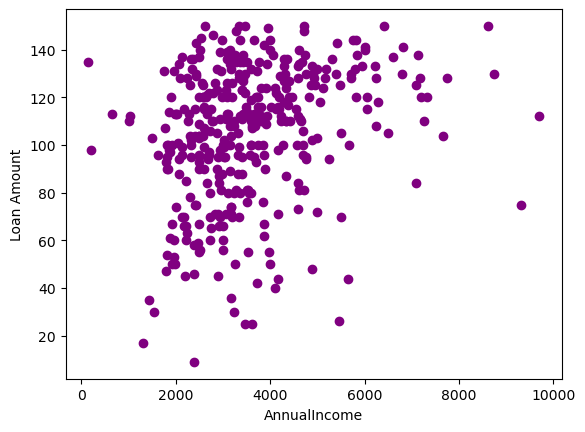

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='purple')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount')
plt.show()

### Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster


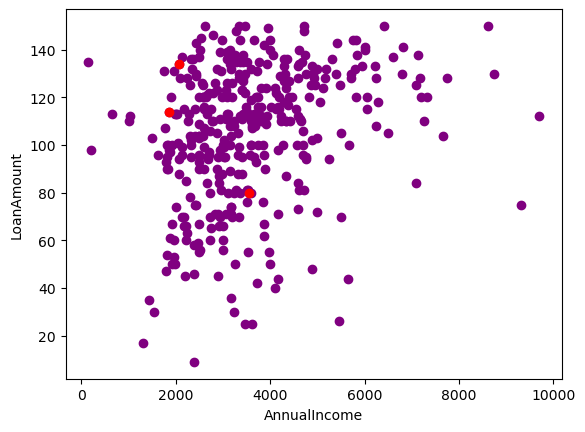

In [10]:
k = 3 # gonna choose 3 clusters

Centroids = (X.sample(n=k)) # returns specified number of random rows fro the dataframe 'X', in our case k random centroids 
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c= 'purple')
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('LoanAmount')
plt.show()

### Step 3 - Assign all the points to the closest cluster centroid
### Step 4 - Recompute centroids of newly formed clusters
### Step 5 - Repeat step 3 and 4


In [5]:
print(Centroids)
X.head()

     LoanAmount  ApplicantIncome
194       135.0             3762
219        95.0             2666
159       115.0             6045


,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333


In [11]:
diff = 1
j=0
#ED represents the euclideen distance

while(diff!=0): #if the diff==0 that means that clusters changement is stable, so we stop theres 
    XD=X.copy() #i used this instead of assiginng df to df directly cuz that causes problems like settingwithcopywarning
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows(): # here we gonna calculate the distance between every centroid in row_c(Centroids) and the point tuples coming from row_d (Dataframe)
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    
    #in order to update the centroids we'll calculate the mean
    NewCentroid = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (NewCentroid['LoanAmount'] - Centroids['LoanAmount']).sum() + (NewCentroid['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

703.2393481745114
689.8328408905534
640.4653401681547
517.9697501876105
446.3901932294361
236.56760129632977
216.13679395380288
277.68763984371935
244.66095351174067
229.06905235705375
218.24897861156342
107.07928213052429
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


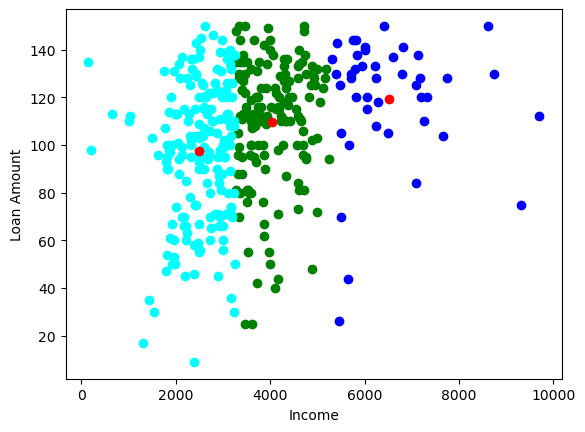

In [12]:
color=['blue','green','cyan']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()  

Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid. We are more likely to find a solution that is competitive with the optimal K-Means solution while using the K-Means++ initialization.

The steps to initialize the centroids using K-Means++ are:

The first cluster is chosen uniformly at random from the data points we want to cluster. This is similar to what we do in K-Means, but instead of randomly picking all the centroids, we just pick one centroid here
Next, we compute the distance (D(x)) of each data point (x) from the cluster center that has already been chosen
Then, choose the new cluster center from the data points with the probability of x being proportional to (D(x))2
We then repeat steps 2 and 3 until k clusters have been chosen